<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap17/17_2_Reparameterization_Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 17.2: Reparameterization trick**

This notebook investigates the reparameterization trick as described in section 17.7 of the book.

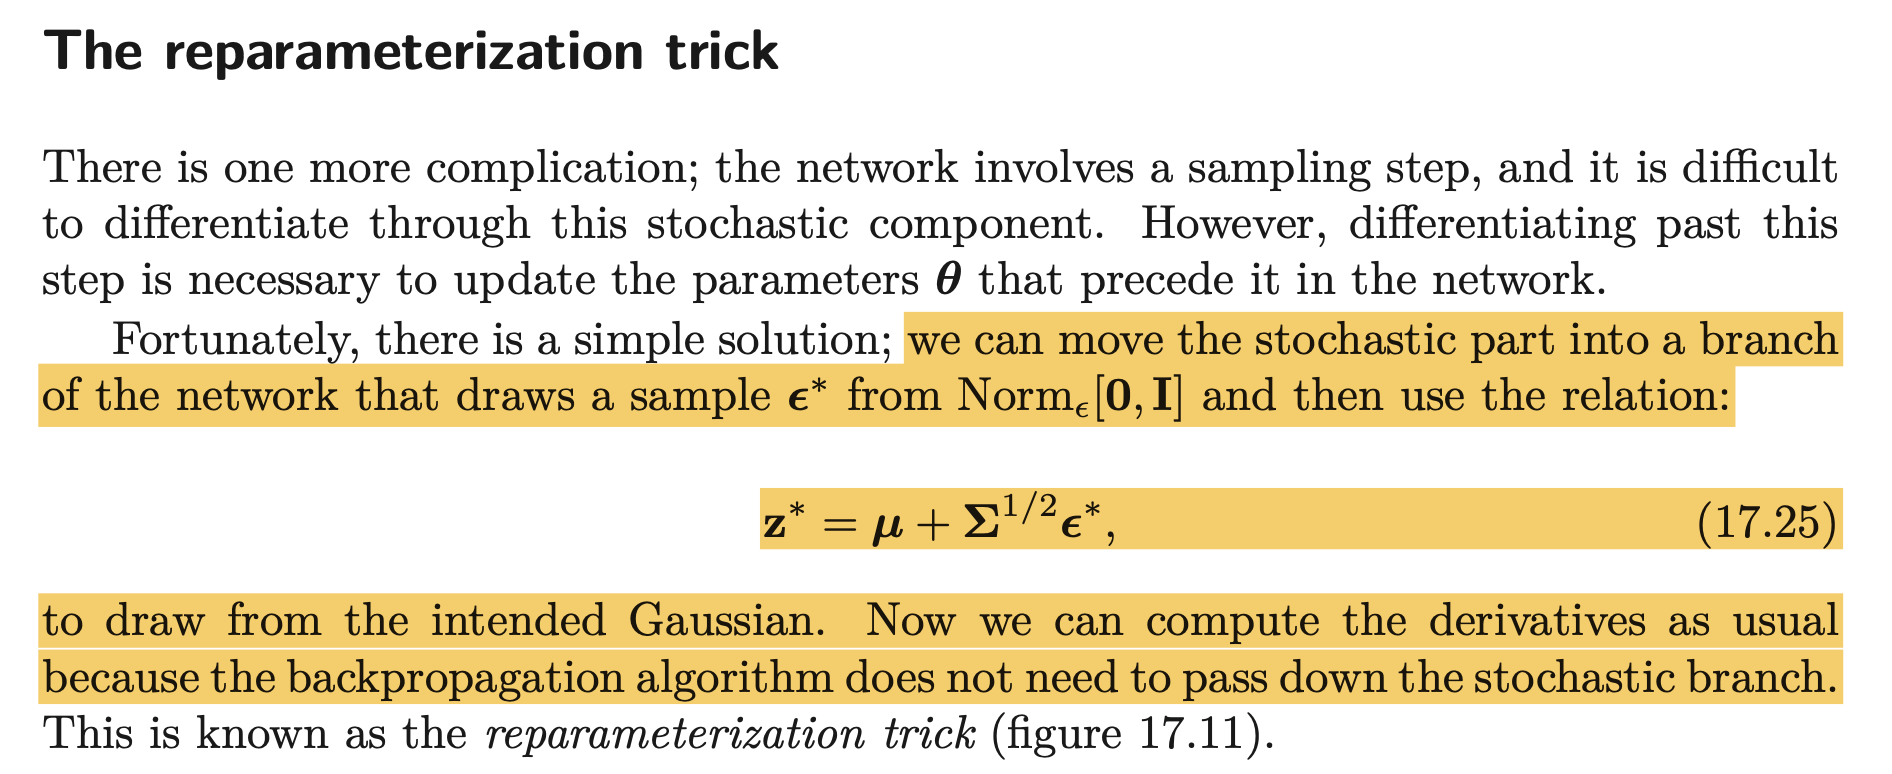  
  
    
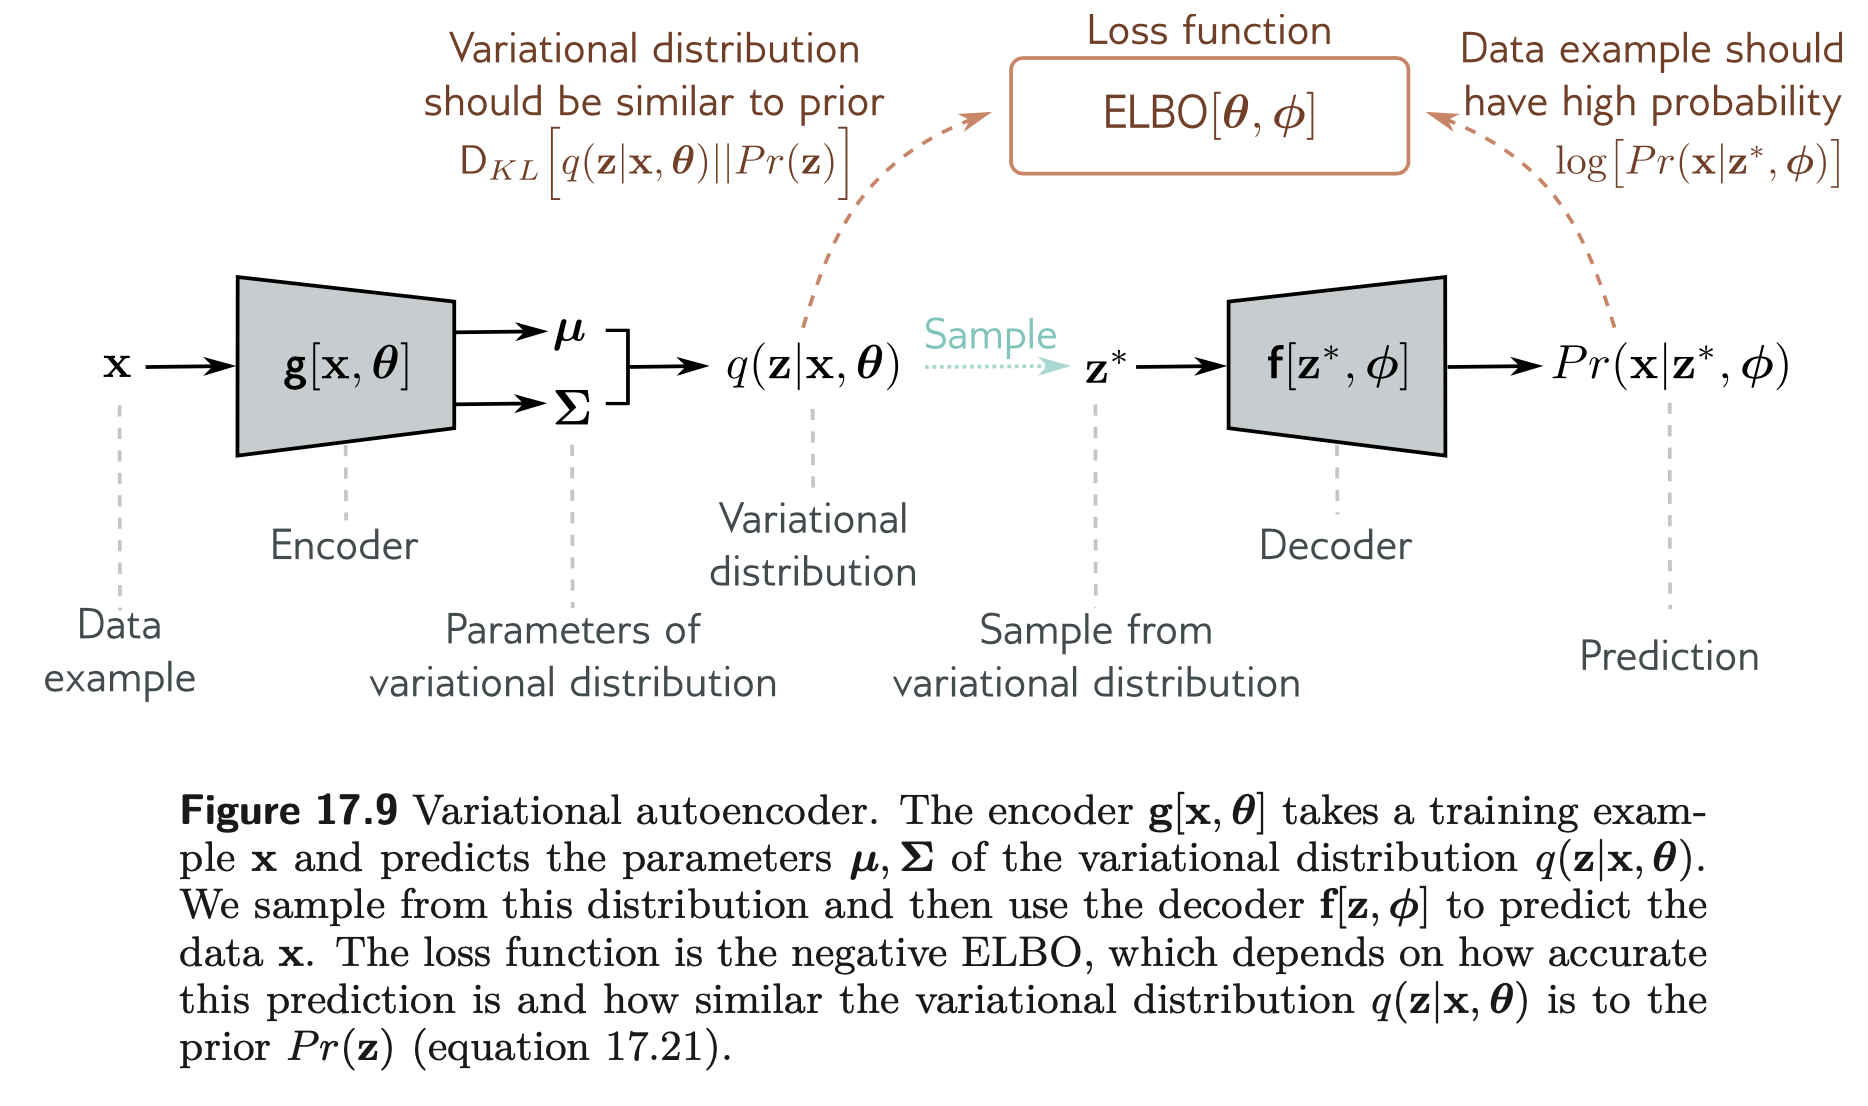      
  
    
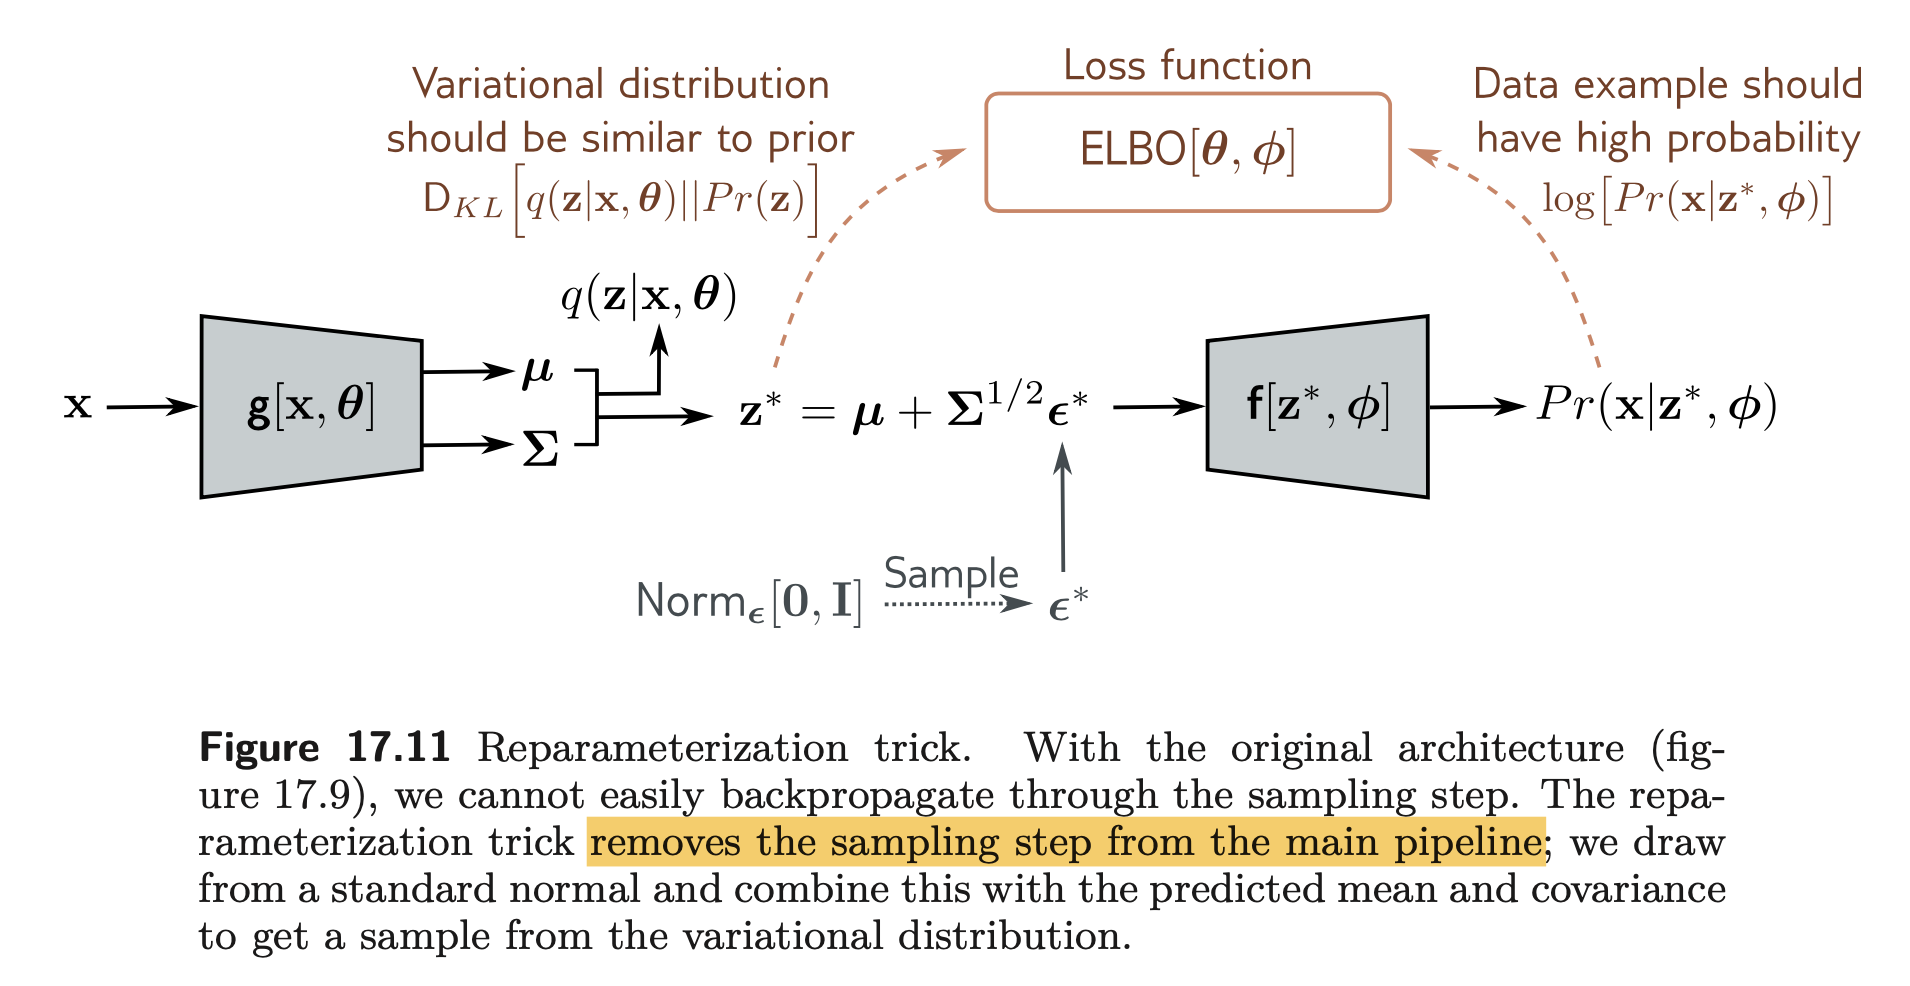

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

The reparameterization trick computes the derivative of an expectation of a function $\text{f}[x]$:

\begin{equation}
\frac{\partial}{\partial \boldsymbol\phi} \mathbb{E}_{Pr(x|\boldsymbol\phi)}\bigl[\text{f}[x]\bigr],
\end{equation}

with respect to the parameters $\boldsymbol\phi$ of the distribution $Pr(x|\boldsymbol\phi)$ that the expectation is over.

Let's consider a simple concrete example, where:

\begin{equation}
Pr(x|\phi) = \text{Norm}_{x}\Bigl[\mu, \sigma^2\Bigr]=\text{Norm}_{x}\Bigl[\phi^3,(\exp[\phi])^2\Bigr]
\end{equation}

and

\begin{equation}
\text{f}[x] = x^2+\sin[x]
\end{equation}

In [5]:
def f(x):
    return((x**2) + np.sin(x))

In [6]:
# Let's approximate this expectation for a particular value of phi
def compute_expectation(phi, n_samples):
  # TODO complete this function
  
  # 1. Compute the mean of the normal distribution, mu
  mu = phi ** 3
    
  # 2. Compute the standard deviation of the normal distribution, sigma
  sigma = np.exp(phi)

  # 3. Draw n_samples samples using np.random.normal(mu, sigma, size=(n_samples, 1))
  samples = np.random.normal(mu, sigma, size=(n_samples, 1))

  # 4. Compute f[x] for each of these samples
  f_samples = f(samples)

  # 5. Approximate the expectation by taking the average of the values of f[x]
  # Replace this line
  expected_f_given_phi = np.mean(f_samples)

  return expected_f_given_phi

In [7]:
# Set the seed so the random numbers are all the same
np.random.seed(0)

# Compute the expectation for two values of phi
phi1 = 0.5
n_samples = 10000000
expected_f_given_phi1 = compute_expectation(phi1, n_samples)
print("Your value: ", expected_f_given_phi1, ", True value:  2.7650801613563116")

phi2 = -0.1
n_samples = 10000000
expected_f_given_phi2 = compute_expectation(phi2, n_samples)
print("Your value: ", expected_f_given_phi2, ", True value:  0.8176793102849222")

Your value:  2.7650801613563116 , True value:  2.7650801613563116
Your value:  0.8176793102849222 , True value:  0.8176793102849222


Le't plot this expectation as a function of phi

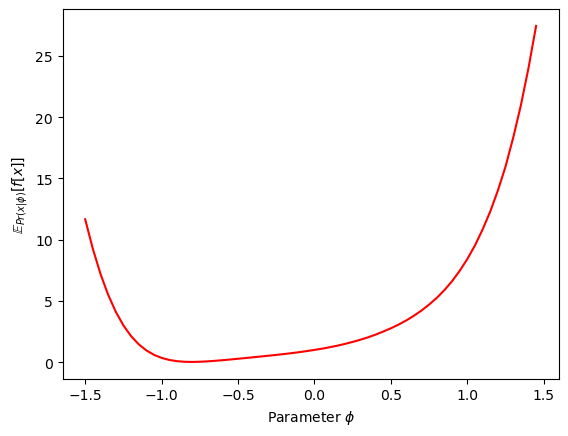

In [8]:
phi_vals = np.arange(-1.5,1.5, 0.05)
expected_vals = np.zeros_like(phi_vals)
n_samples = 1000000
for i in range(len(phi_vals)):
  expected_vals[i] = compute_expectation(phi_vals[i], n_samples)

fig,ax = plt.subplots()
ax.plot(phi_vals, expected_vals,'r-')
ax.set_xlabel('Parameter $\phi$')
ax.set_ylabel('$\mathbb{E}_{Pr(x|\phi)}[f[x]]$')
plt.show()

It's this curve that we want to find the derivative of (so for example, we could run gradient descent and find the minimum.

This is tricky though -- if you look at the computation that you performed, then there is a sampling step in the procedure (step 3).  How do we compute the derivative of this?

The answer is the reparameterization trick.  We note that:

\begin{equation}
\text{Norm}_{x}\Bigl[\mu, \sigma^2\Bigr]=\text{Norm}_{x}\Bigl[0, 1\Bigr] \times \sigma + \mu
\end{equation}

and so:

\begin{equation}
\text{Norm}_{x}\Bigl[\phi^3,(\exp[\phi])^2\Bigr]  = \text{Norm}_{x}\Bigl[0, 1\Bigr] \times \exp[\phi]+ \phi^3
\end{equation}

So, if we draw a sample $\epsilon^*$ from $\text{Norm}_{\epsilon}[0, 1]$, then we can compute a sample $x^*$ as:

\begin{align}
x^* &=& \epsilon^* \times \sigma + \mu \\
&=& \epsilon^* \times \exp[\phi]+ \phi^3
\end{align}

In [9]:
def compute_df_dx_star(x_star):
  # TODO Compute this derivative (function defined at the top)
  # Replace this line:
  deriv = (2 * x_star) + np.cos(x_star);

  return deriv

def compute_dx_star_dphi(epsilon_star, phi):
  # TODO Compute this derivative
    # Replace this line:
  deriv = (epsilon_star * np.exp(phi)) + (3 * (phi ** 2));

  return deriv

def compute_derivative_of_expectation(phi, n_samples):
  # Generate the random values of epsilon
  epsilon_star= np.random.normal(size=(n_samples,1))
    
  # TODO -- write
  # 1. Compute dx*/dphi using the function defined above
  dx_star_dphi = compute_dx_star_dphi(epsilon_star, phi)

  # 2. Compute x*
  x_star = (epsilon_star * np.exp(phi)) + phi ** 3

  # 3. Compute df/dx* using the function you wrote above
  df_dx_star = compute_df_dx_star(x_star) 

  # 4. Compute df/dphi = df/x* * dx*dphi
  df_dphi = df_dx_star * dx_star_dphi   
    
    
  # 5. Average the samples of df/dphi to get the expectation.
  # Replace this line:
  df_dphi = np.mean (df_dphi)

  return df_dphi

In [10]:
# Set the seed so the random numbers are all the same
np.random.seed(0)

# Compute the expectation for two values of phi
phi1 = 0.5
n_samples = 10000000

deriv = compute_derivative_of_expectation(phi1, n_samples)
print("Your value: ", deriv, ", True value:  5.726338035051403")

Your value:  5.726338035051403 , True value:  5.726338035051403


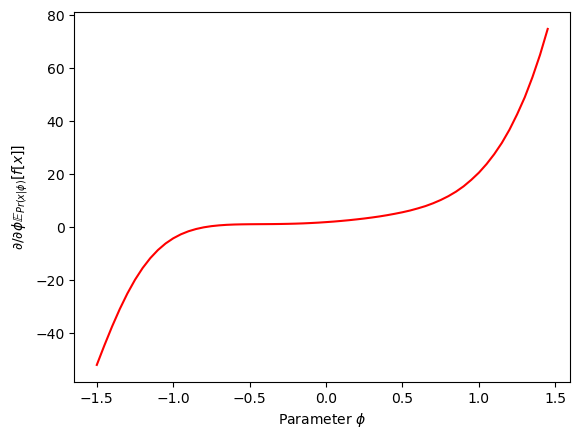

In [11]:
phi_vals = np.arange(-1.5,1.5, 0.05)
deriv_vals = np.zeros_like(phi_vals)
n_samples = 1000000
for i in range(len(phi_vals)):
  deriv_vals[i] = compute_derivative_of_expectation(phi_vals[i], n_samples)

fig,ax = plt.subplots()
ax.plot(phi_vals, deriv_vals,'r-')
ax.set_xlabel('Parameter $\phi$')
ax.set_ylabel('$\partial/\partial\phi\mathbb{E}_{Pr(x|\phi)}[f[x]]$')
plt.show()

This should look plausibly like the derivative of the function we plotted above!

The reparameterization trick computes the derivative of an expectation of a function $\text{f}[x]$:

\begin{equation}
\frac{\partial}{\partial \boldsymbol\phi} \mathbb{E}_{Pr(x|\boldsymbol\phi)}\bigl[\text{f}[x]\bigr],
\end{equation}

with respect to the parameters $\boldsymbol\phi$ of the distribution $Pr(x|\boldsymbol\phi)$ that the expectation is over. This derivative can also be computed as:

\begin{align}
\frac{\partial}{\partial \boldsymbol\phi} \mathbb{E}_{Pr(x|\boldsymbol\phi)}\bigl[\text{f}[x]\bigr] &=& \mathbb{E}_{Pr(x|\boldsymbol\phi)}\left[\text{f}[x]\frac{\partial}{\partial \boldsymbol\phi} \log\bigl[ Pr(x|\boldsymbol\phi)\bigr]\right]\nonumber \\
&\approx & \frac{1}{I}\sum_{i=1}^{I}\text{f}[x_i]\frac{\partial}{\partial \boldsymbol\phi} \log\bigl[ Pr(x_i|\boldsymbol\phi)\bigr].
\end{align}

This method is known as the REINFORCE algorithm or score function estimator.  Problem 17.5 asks you to prove this relation.  Let's use this method to compute the gradient and compare.

Recall that the expression for a univariate Gaussian is:

\begin{equation}
 Pr(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left[-\frac{(x-\mu)^{2}}{2\sigma^{2}}\right].
\end{equation}


To compute the derivative of the log-likelihood log[Pr(x∣ϕ)] with respect to ϕ, we first need to express the log-likelihood using the provided parameters.  
  
    
The probability density function (PDF) of the normal distribution is given by:  
  
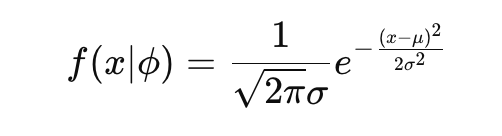
  
  
Therefore, the log-likelihood is:  
  
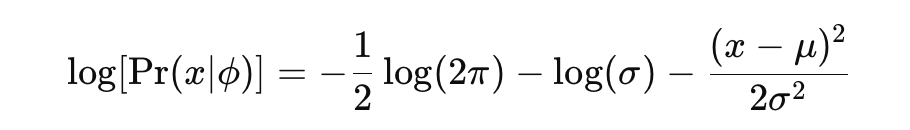  
  
Substituting $\mu = \phi^{3}$ and $\sigma^{2} = \exp(\phi)^{2}$, we obtain:  
  
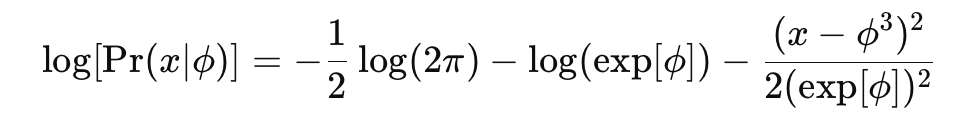  

  
  
Now we can differentiate this expression with respect to $\phi$.


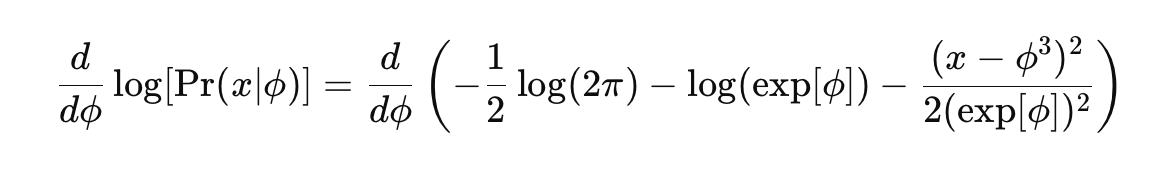

(I had to use the website : https://pt.symbolab.com/solver/derivative-calculator/%5Cfrac%7B%5Cpartial%7D%7B%5Cpartial%20phi%7D%5Cleft(%5Cfrac%7B-1%7D%7B2%7D%5Ccdot%5Clog_%7Be%7D%5Cleft(2%5Ccdot%20pi%5Cright)%20-%20%5Clog_%7Be%7D%5Cleft(e%5E%7Bphi%7D%5Cright)-%5Cfrac%7B%5Cleft(x-phi%5E%7B3%7D%5Cright)%5E%7B2%7D%7D%7B2%5Ccdot%20e%5E%7B2%5Ccdot%20phi%7D%7D%5Cright)?or=input)

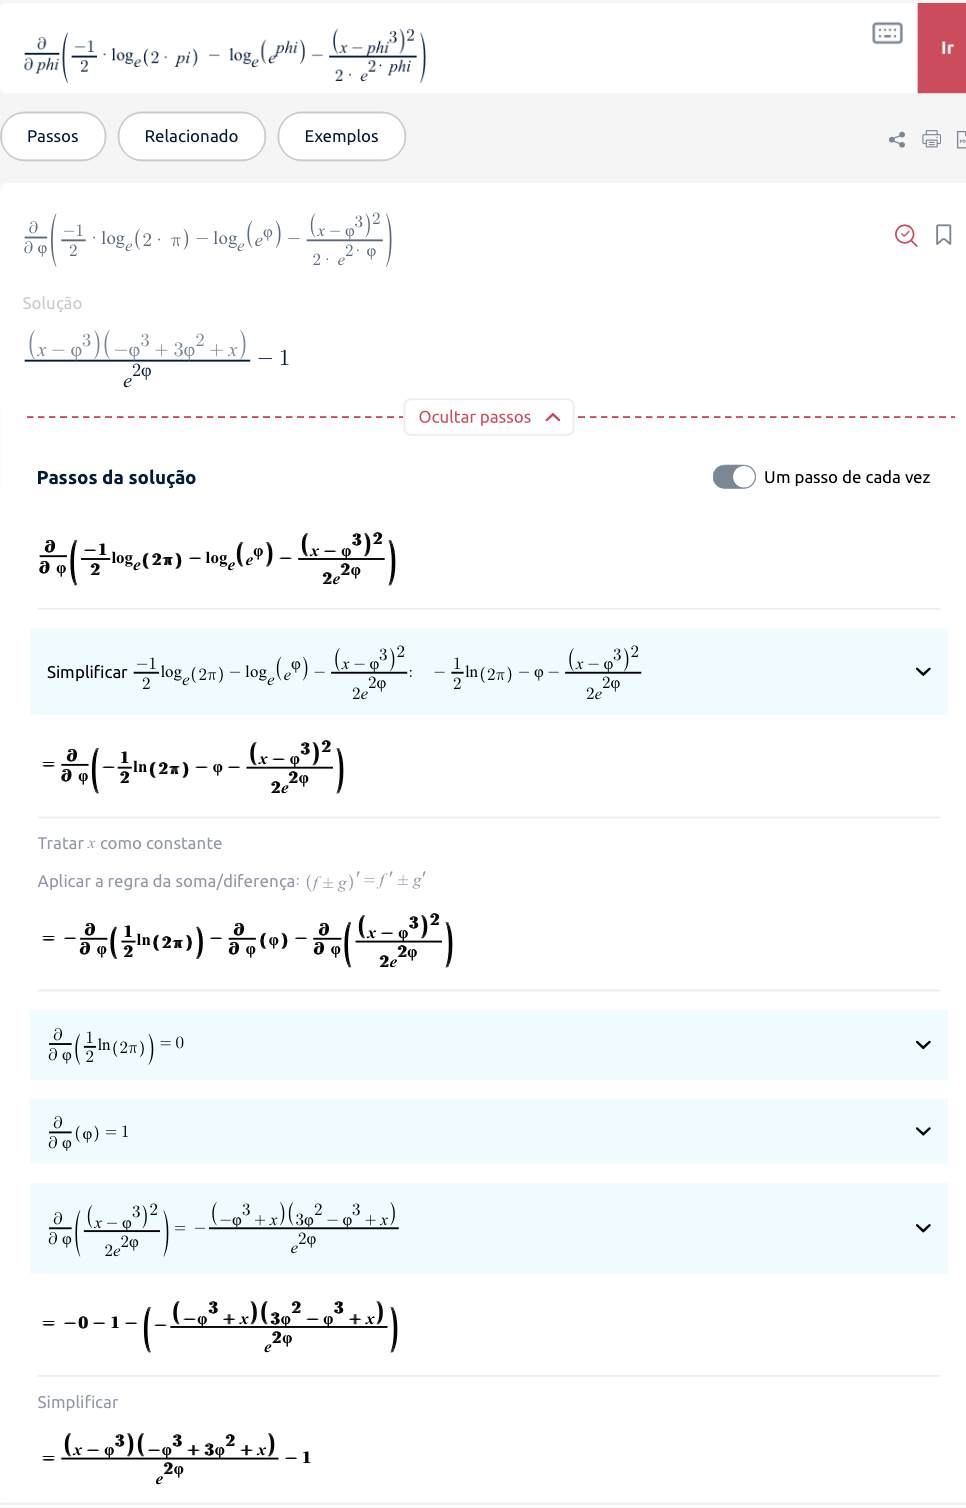


In [23]:
def d_log_pr_x_given_phi(x,phi):
  # TODO -- fill in this function
  # Compute the derivative of log[Pr(x|phi)]
  # Replace this line: (see development above -- I divided the formula in parts because of the errors)

  deriv = ((x-(phi**3))*(-(phi**3)+(3*(phi**2)+x))/(np.exp(2*phi)))-1

  return deriv

In [24]:
def compute_derivative_of_expectation_score_function(phi, n_samples):
  # TODO -- Compute this function

  # 1. Calculate mu from phi
  mu = phi ** 3 

  # 2. Calculate sigma from phi
  sigma = np.exp(phi) 

  # 3. Generate n_sample random samples of x using np.random.normal
  x = np.random.normal(mu, sigma, size=(n_samples, 1))  
    
  # 4. Calculate f[x] for all of the samples
  fx = f(x)

  # 5. Multiply f[x] by d_log_pr_x_given_phi
  fx_dlog = fx * d_log_pr_x_given_phi(x,phi)

  # 6. Take the average of the samples
  avx = np.mean(fx_dlog)

  # Replace this line:
  deriv = avx

  return deriv

In [25]:
# Set the seed so the random numbers are all the same
np.random.seed(0)

# Compute the expectation for two values of phi
phi1 = 0.5
n_samples = 100000000

deriv = compute_derivative_of_expectation_score_function(phi1, n_samples)
print("Your value: ", deriv, ", True value:  5.724609927313369")

Your value:  5.724609927313369 , True value:  5.724609927313369


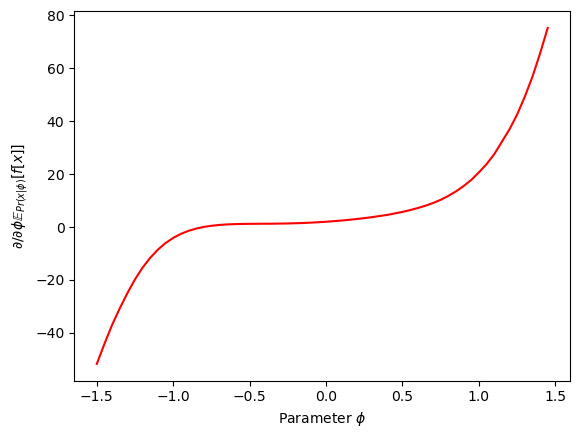

In [26]:
phi_vals = np.arange(-1.5,1.5, 0.05)
deriv_vals = np.zeros_like(phi_vals)
n_samples = 1000000
for i in range(len(phi_vals)):
  deriv_vals[i] = compute_derivative_of_expectation_score_function(phi_vals[i], n_samples)

fig,ax = plt.subplots()
ax.plot(phi_vals, deriv_vals,'r-')
ax.set_xlabel('Parameter $\phi$')
ax.set_ylabel('$\partial/\partial\phi\mathbb{E}_{Pr(x|\phi)}[f[x]]$')
plt.show()

This should look the same as the derivative that we computed with the reparameterization trick.  So, is there any advantage to one way or the other?  Let's compare the variances of the estimates


In [27]:
n_estimate = 100
n_sample = 1000
phi = 0.3
reparam_estimates = np.zeros((n_estimate,1))
score_function_estimates = np.zeros((n_estimate,1))
for i in range(n_estimate):
  reparam_estimates[i]= compute_derivative_of_expectation(phi, n_samples)
  score_function_estimates[i] = compute_derivative_of_expectation_score_function(phi, n_samples)

print("Variance of reparameterization estimator", np.var(reparam_estimates))
print("Variance of score function estimator", np.var(score_function_estimates))

Variance of reparameterization estimator 2.298691023296728e-05
Variance of score function estimator 0.00028917019669860293


The variance of the reparameterization estimator should be quite a bit lower than the score function estimator which is why it is preferred in this situation.